# **TC2004B - Análisis Exploratorio de Datos**
#### **Nombre:** Miguel Angel Hernández Ochoa
#### **Matrícula:** A00830949


## **1. INTRODUCCIÓN**

El Titanic es un barco reconocido en la era actual por su trágico accidente a principios del siglo XX, donde toma lugar el naufragio de esta lujosa creación británica a muy poco tiempo de haberse inaugurado. Lamentablemente la nave colisionó contra un iceberg al norte del Oceano Atlántico durante la madrugada del 15 de abril de 1912, provocando la muerte de más de 1500 personas.

Cabe destacar que esta catastrófica noticia tuvo como consecuencia una serie de cambios en las normas de seguridad marítima internacional, sin mencionar que el barco contaba únicamente con 20 botes salvavidas para el total de personas a bordo.

En la actualidad resulta interesante contar con un set de datos de los asistentes debido a que podemos sumergirnos en el contexto de aquella época, además de resultar bastante rico en información, como nos han enseñado en lo que va del curso: los datos son una pieza clave para poder encontrar patrones y recursos fundamentales.




In [30]:
# Importación de Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga del Dataset del Titanic
dataset = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(dataset)

# Visualización de las primeras filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
# Estadísticas descriptivas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **2. PARTE 1. Variación**

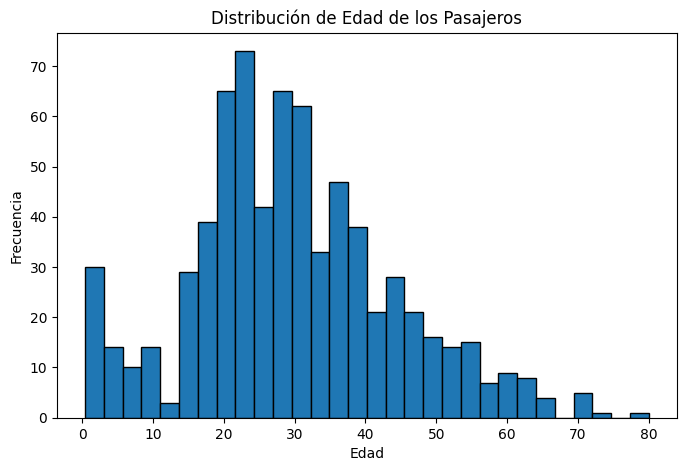

In [33]:
# Visualización de la variable Edad (Age)
plt.figure(figsize=(8,5))
plt.hist(df['Age'].dropna(), bins=30, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edad de los Pasajeros')
plt.show()

**¿Cómo se distribuye la edad de los pasajeros? ¿Existen grupos etarios claramente definidos?**

Al analizar el histograma de la variable Age, se observa una concentración importante de pasajeros entre aproximadamente 20 y 35 años. También se detecta presencia de niños pequeños, aunque en menor proporción. No parece haber una distribución completamente simétrica; la distribución muestra una ligera asimetría hacia edades más jóvenes.

Existen algunos valores extremos hacia edades avanzadas, pero no parecen representar outliers exagerados.

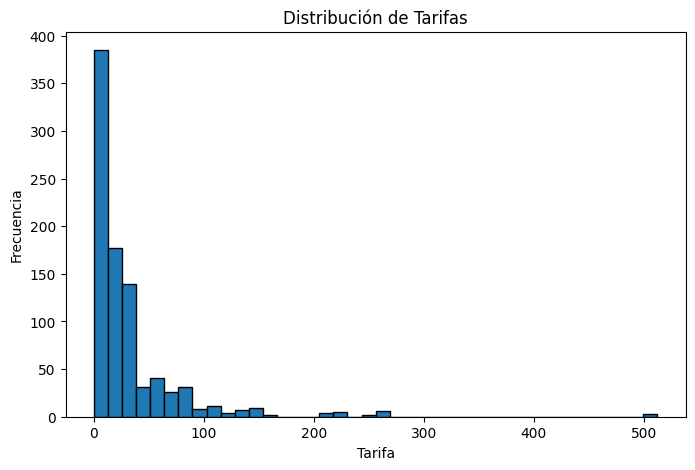

In [34]:
# Visualización de la variable Tarifa (Fare)
plt.figure(figsize=(8,5))
plt.hist(df['Fare'], bins=40, edgecolor='black')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.title('Distribución de Tarifas')
plt.show()

**¿Cómo se distribuyen las tarifas pagadas? ¿Existen valores atípicos?**

La distribución de Fare está fuertemente sesgada hacia la derecha. La mayoría de los pasajeros pagaron tarifas relativamente bajas, pero existen algunos valores extremadamente altos que generan una cola larga en la distribución.

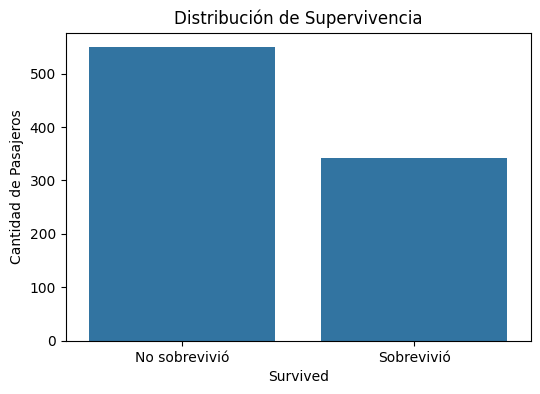

np.float64(0.3838383838383838)

In [35]:
# Creación de la variable conteo de Supervivencia (Survived)
survival_counts = df['Survived'].value_counts()

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.xticks([0,1], ['No sobrevivió', 'Sobrevivió'])
plt.ylabel('Cantidad de Pasajeros')
plt.title('Distribución de Supervivencia')
plt.show()

# Proporción
df['Survived'].mean()

**¿Qué proporción de pasajeros sobrevivió?**

La proporción de supervivencia es menor al 50%. La mayoría de los pasajeros no sobrevivió.

### **Hipótesis a Postular**
Los valores extremos correspondientes a la variable Fare probablemente correspondan a pasajeros de primera clase con acceso a suites de lujo. La desigualdad económica dentro del barco parece marcada, lo cual podría relacionarse posteriormente con la tasa de supervivencia.

## **PARTE 2. Covariación**

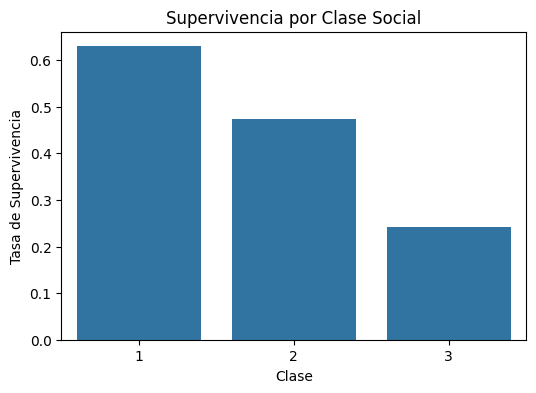

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [36]:
# Tasa de supervivencia por clase (obtención de promedio de las variables)
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Clase')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia por Clase Social')
plt.show()

survival_by_class

**¿La tasa de supervivencia fue diferente entre clases sociales?**

Al calcular la proporción de supervivencia por clase, se observa que los pasajeros de primera clase tienen una tasa significativamente mayor de supervivencia en comparación con tercera clase.

Esto sugiere que la clase social influyó en la probabilidad de sobrevivir. Una posible explicación histórica es que los pasajeros de primera clase estaban ubicados más cerca de la cubierta y los botes salvavidas, además de tener mayor prioridad durante la evacuación.

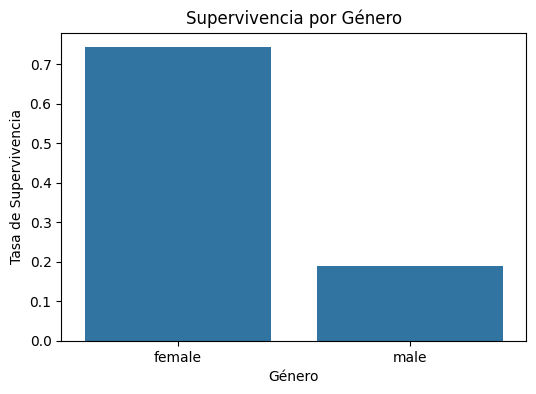

,Survived
Sex,
female,0.742038
male,0.188908


In [37]:
# Tasa de supervivencia por género
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Visualización
plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.xlabel('Género')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia por Género')
plt.show()

survival_by_gender

**¿Hubo diferencias de supervivencia por género?**

La tasa de supervivencia es considerablemente mayor en mujeres que en hombres.

Esto parece consistente con el principio de “mujeres y niños primero”. Sin embargo, esta diferencia no implica que todos los hombres hayan sido excluidos ni que todas las mujeres hayan sobrevivido. Lo que observamos es una tendencia clara, no una regla absoluta.

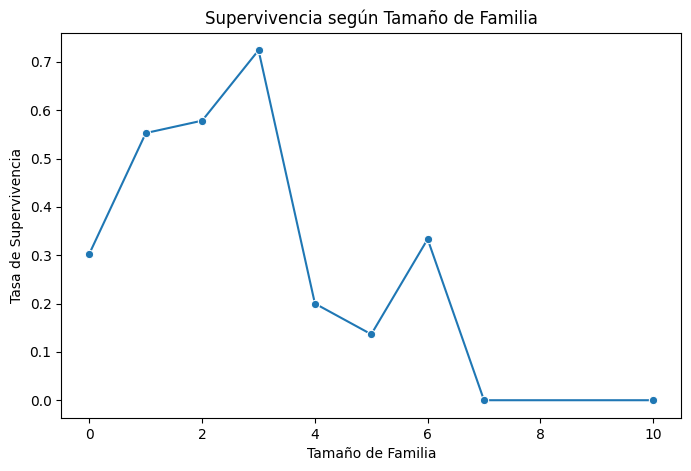

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


In [38]:
# Relación de la tasa de supervivencia con el tamaño de familias
df['FamilySize'] = df['SibSp'] + df['Parch']

# Almacenamiento en variable nueva obteniendo el promedio de ambas variables
survival_by_family = df.groupby('FamilySize')['Survived'].mean()

# Visualización
plt.figure(figsize=(8,5))
sns.lineplot(x=survival_by_family.index, y=survival_by_family.values, marker='o')
plt.xlabel('Tamaño de Familia')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia según Tamaño de Familia')
plt.show()

survival_by_family

**¿El tamaño de la familia influyó en la supervivencia?**

Los pasajeros que viajaban completamente solos parecen tener menor tasa de supervivencia comparados con aquellos que viajaban en grupos pequeños. Sin embargo, familias demasiado grandes tampoco muestran la tasa más alta.

Esto sugiere que viajar con un grupo pequeño pudo haber ofrecido cierta ventaja, posiblemente por apoyo mutuo o mayor visibilidad. En contraste, familias muy grandes podrían haber enfrentado dificultades logísticas durante la evacuación.

## **PARTE 3. Valores Faltantes**

In [39]:
# Inspección de valores faltantes
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

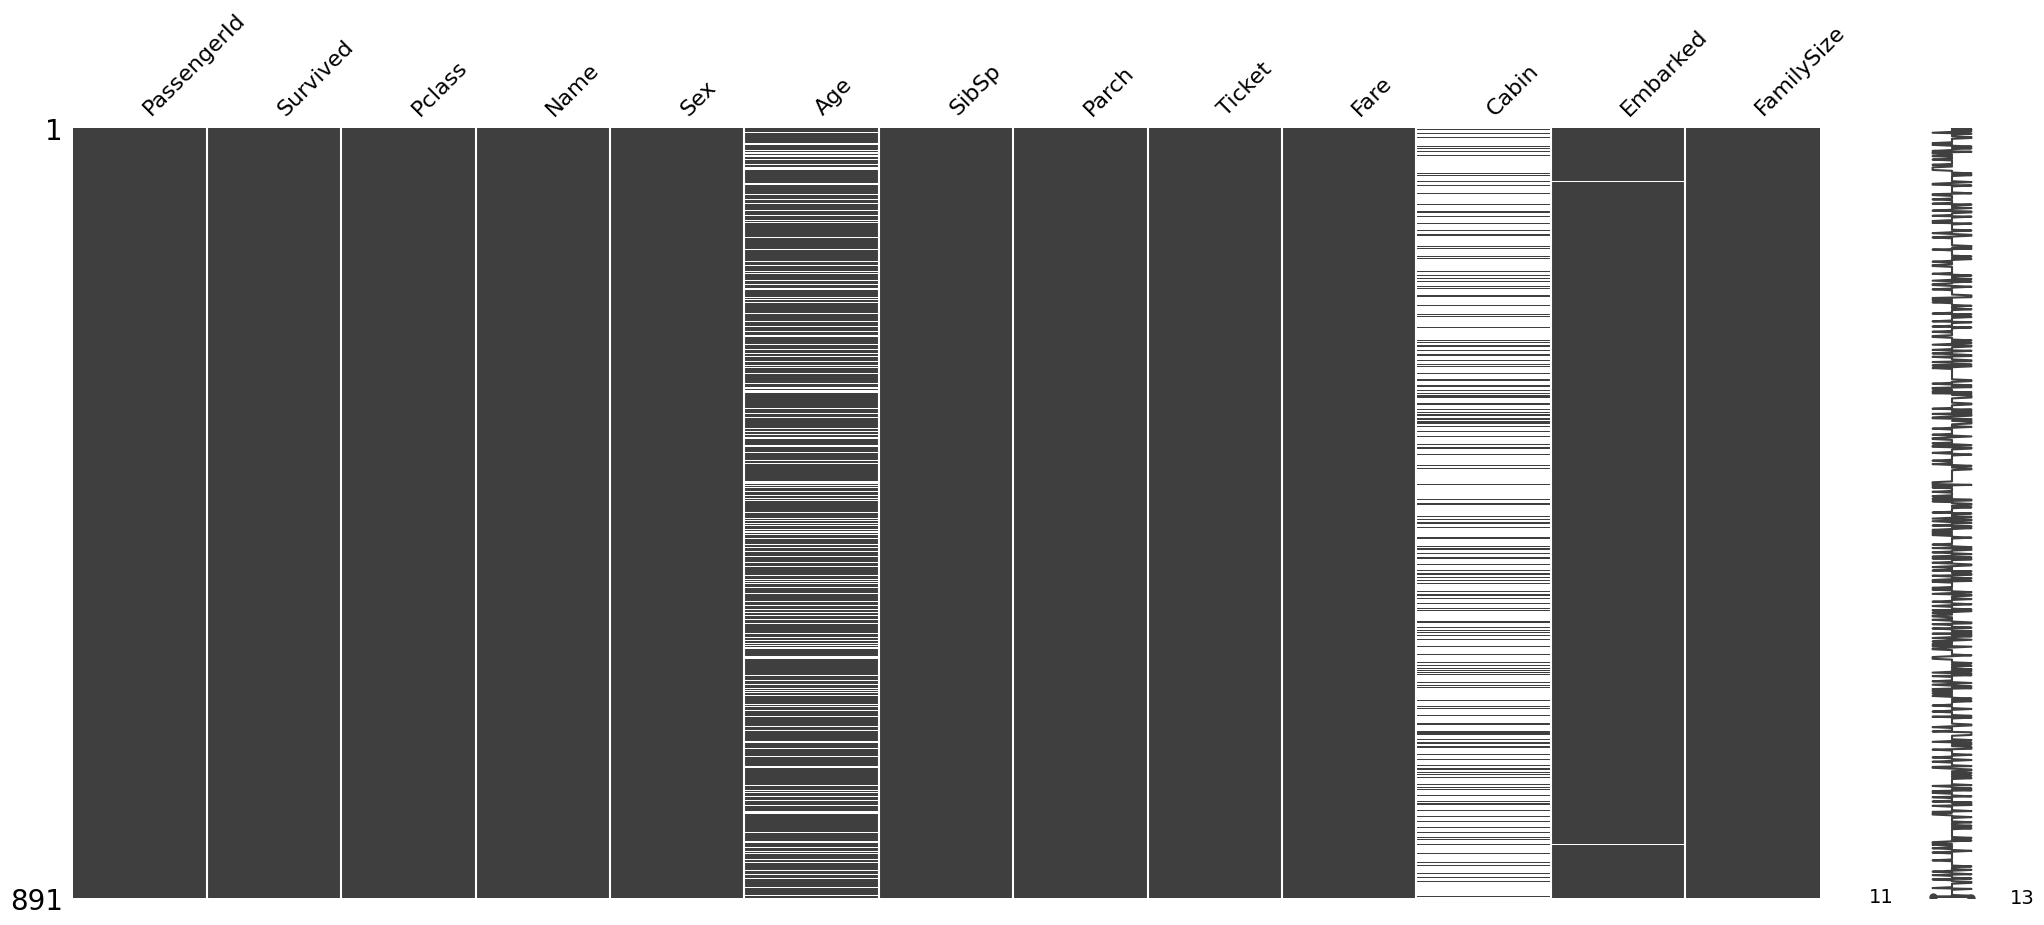

In [40]:
# Visualización de patrones de valores faltantes
import missingno as msno

# Missing
msno.matrix(df)

**¿Qué variables tienen valores faltantes?**

Al inspeccionar valores faltantes:

*   *Age* tiene valores faltantes.
*   *Cabin* tiene una gran cantidad de datos faltantes.
*   *Embarked* tiene algunos pocos valores faltantes.

**¿Los valores faltantes son aleatorios o siguen un patrón?**

Es probable que la falta de datos en Cabin esté relacionada con clase social, ya que los pasajeros de tercera clase probablemente no tenían asignaciones de cabina tan detalladas como los de primera clase.

En el caso de Age, los valores faltantes podrían no ser completamente aleatorios, lo que introduce incertidumbre en análisis relacionados con edad.

**¿Cómo manejarían estos valores faltantes? Justifiquen su respuesta.**

*   *Age:* imputar con la mediana por clase social podría ser razonable.
*   *Cabin:* probablemente excluirla del análisis debido al alto porcentaje de datos faltantes.
*   *Embarked:* imputar con el valor más frecuente.

## **PARTE 4. Pregunta Original**

Retomando la Hipótesis planteada en la Parte 1 de este notebook:

#### Los valores extremos correspondientes a la variable Fare probablemente correspondan a pasajeros de primera clase con acceso a suites de lujo. La desigualdad económica dentro del barco parece marcada, lo cual podría relacionarse posteriormente con la tasa de supervivencia.

#### **Por lo tanto: ¿La desigualdad económica dentro del barco se relaciona directamente con la tasa de supervivencia?**

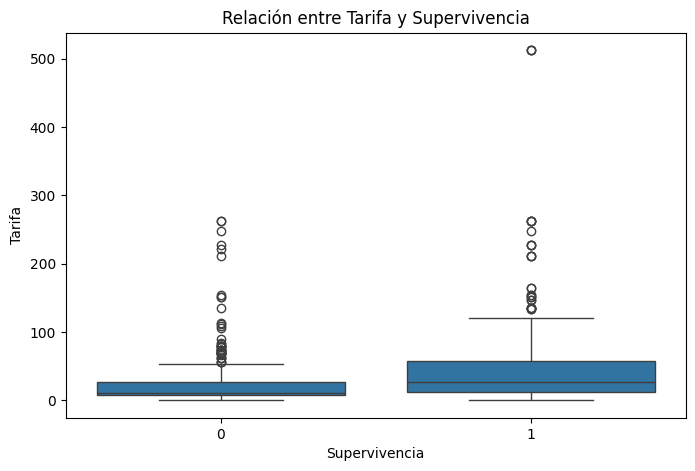

In [41]:
# Exploración visual entre la relación entre la tarifa y la supervivencia
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.xlabel('Supervivencia')
plt.ylabel('Tarifa')
plt.title('Relación entre Tarifa y Supervivencia')
plt.show()

In [42]:
# Comparación de promedios y medianas
fare_by_survival = df.groupby('Survived')['Fare'].agg(['mean','median','std','count'])
fare_by_survival

,mean,median,std,count
Survived,,,,
0,22.117887,10.5,31.388207,549
1,48.395408,26.0,66.596998,342


In [43]:
# Creación de categorías económicas por medio de cuartiles
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Bajo','Medio-Bajo','Medio-Alto','Alto'])
survival_by_faregroup = df.groupby('FareGroup')['Survived'].mean()
survival_by_faregroup

/tmp/ipython-input-651764380.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_faregroup = df.groupby('FareGroup')['Survived'].mean()


,Survived
FareGroup,
Bajo,0.197309
Medio-Bajo,0.303571
Medio-Alto,0.454955
Alto,0.581081


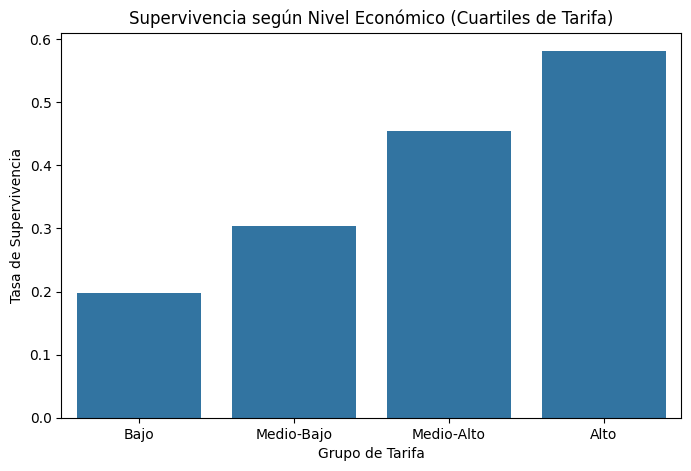

In [44]:
# Interpretación
plt.figure(figsize=(8,5))
sns.barplot(x=survival_by_faregroup.index, y=survival_by_faregroup.values)
plt.xlabel('Grupo de Tarifa')
plt.ylabel('Tasa de Supervivencia')
plt.title('Supervivencia según Nivel Económico (Cuartiles de Tarifa)')
plt.show()

**Interpretación:**

Al comparar la distribución de tarifas entre sobrevivientes y no sobrevivientes, podemos apreciar que los pasajeros que sobrevivieron tienden a haber pagado tarifas más altas en promedio.

La mediana y el promedio de la variable Fare son considerablemente mayores en el grupo de sobrevivientes. Esto sugiere que el nivel económico pudo haber influido en la probabilidad de sobrevivir.

Cuando se agrupan los pasajeros en cuartiles de tarifa, se observa una tendencia creciente: los grupos con tarifas más altas presentan mayores tasas de supervivencia. Esta relación no parece aleatoria, sino consistente.

Sin embargo, es importante aclarar que no afirmamos causalidad. La tarifa pagada no es necesariamente la causa directa de la supervivencia.

**Conclusiones:**

Los datos muestran una asociación clara entre tarifa pagada y supervivencia. Los pasajeros con mayores tarifas presentan mayores probabilidades de sobrevivir.

No obstante, esta relación parece estar mediada en gran medida por la clase social. La tarifa actua como indicador de posición estructural dentro del barco.

Por lo tanto, la desigualdad económica sí se relaciona con la tasa de supervivencia, pero no necesariamente de forma directa, sino a través del acceso a recursos.

## **REFLEXIÓN FINAL**

Lo más difícil del análisis exploratorio no fue generar las gráficas, sino formular preguntas suficientemente interesantes y específicas. Es relativamente sencillo ejecutar código, pero interpretar correctamente los patrones sin sobreextender conclusiones requiere mayor cuidado.

Aprendí que el EDA es un proceso iterativo. Una gráfica lleva a una nueva pregunta, y esa nueva pregunta puede cambiar completamente el enfoque inicial. También comprendí que los valores faltantes no son simplemente un problema técnico, sino una fuente potencial de sesgos.

Más que obtener respuestas definitivas, el análisis exploratorio desarrolla intuición sobre los datos y obliga a cuestionar constantemente lo que creemos estar observando.